# **Spaceship Titanic | Kaggle Challenge**
###### *Harshitha B Nagaraj*

##  *EDA*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importing dataset
spaceship_data = pd.read_csv("train.csv")
# printing the first 5 rows of dataset
spaceship_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
spaceship_data.dropna(inplace=True)

In [5]:
spaceship_columns = list(spaceship_data.columns)
spaceship_columns

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [6]:
print("Missing values distribution: ")
print((spaceship_data.isnull().mean() * 100).round(2))
print("")


Missing values distribution: 
PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
Transported     0.0
dtype: float64



In [7]:
# check datatype in each column
print("Column datatypes: ")
print(spaceship_data.dtypes)

Column datatypes: 
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [8]:
# getting all the columns with string/mixed type values
str_cols = list(spaceship_data.columns)
str_cols.remove('Age')
str_cols.remove('RoomService')
str_cols.remove('FoodCourt')
str_cols.remove('ShoppingMall')
str_cols.remove('Spa')
str_cols.remove('VRDeck')


In [9]:
for i in str_cols:
    if spaceship_data[i].dtype == 'object':
        spaceship_data[i] = spaceship_data[i].astype(str).str.strip()


In [10]:
print("Missing values distribution after filling: ")
print((spaceship_data.isnull().mean() * 100).round(2))
print("")


Missing values distribution after filling: 
PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
Transported     0.0
dtype: float64



In [11]:
spaceship_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [12]:
spaceship_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Length: 6606, dtype: bool

In [13]:
spaceship_data['RoomService'] = pd.to_numeric(spaceship_data['RoomService'], errors='coerce')
spaceship_data['FoodCourt'] = pd.to_numeric(spaceship_data['FoodCourt'], errors='coerce')
spaceship_data['ShoppingMall'] = pd.to_numeric(spaceship_data['ShoppingMall'], errors='coerce')
spaceship_data['Spa'] = pd.to_numeric(spaceship_data['Spa'], errors='coerce')
spaceship_data['VRDeck'] = pd.to_numeric(spaceship_data['VRDeck'], errors='coerce')

spaceship_data['TotalBill'] = spaceship_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1, skipna=True)
print(spaceship_data['TotalBill'])


0           0.0
1         736.0
2       10383.0
3        5176.0
4        1091.0
         ...   
8688     8536.0
8689        0.0
8690     1873.0
8691     4637.0
8692     4826.0
Name: TotalBill, Length: 6606, dtype: float64


In [14]:
spaceship_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalBill
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [15]:
df = pd.DataFrame(spaceship_data)


In [16]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalBill
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [17]:
name_to_search = "Andan Estron"  


filtered_df = df[df['Name'] == name_to_search]


print(filtered_df)

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, TotalBill]
Index: []


In [18]:
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
TotalBill       0
dtype: int64

In [19]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalBill
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,4826.0


In [20]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBill
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048,1497.248259
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166,2860.618493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,739.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000,1513.750000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000,35987.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
 14  TotalBill     6606 non-null   float64
dtypes: bool(1), float64(7), object(7)
memory usage: 780.6+ KB


In [22]:
df.corr()

/var/folders/_j/z5vgmkhn015dp664z1048vzh0000gn/T/ipykernel_90734/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalBill
Age,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553,0.196001
RoomService,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291,0.224410
FoodCourt,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025,0.753124
ShoppingMall,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602,0.216893
Spa,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854,0.592827
VRDeck,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950,0.575334
Transported,-0.082553,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000,-0.190992
TotalBill,0.196001,0.224410,0.753124,0.216893,0.592827,0.575334,-0.190992,1.000000


## *Data Visualization*

###  **Chart-1 : Distribution of passangers according to homeplanet.**

In [23]:
df['HomePlanet'].isna().sum()
df['HomePlanet'].value_counts()

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64


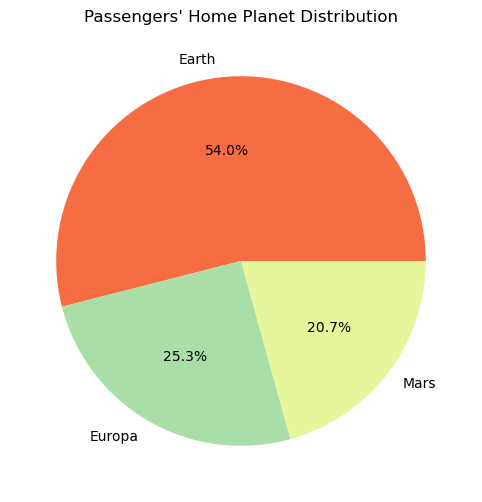

In [24]:
import pandas as pd
import matplotlib.pyplot as plt



planet_counts = df['HomePlanet'].value_counts()
print(planet_counts)
mycolors = ["#F66D44", "#AADEA7", "#E6F69D", "#64C2A6"]

plt.figure(figsize=(8, 6))
plt.pie(planet_counts, labels=planet_counts.index, autopct='%1.1f%%', colors=mycolors)
plt.title("Passengers' Home Planet Distribution")

# Display the chart
plt.show()


### **Bar chart of passengers in cryosleep**

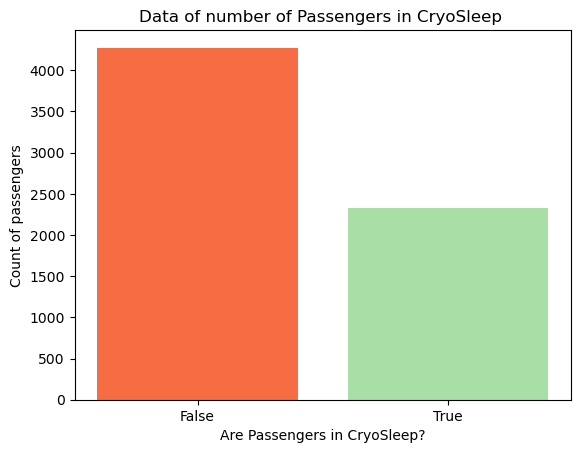

In [25]:
mycolors = ["#F66D44", "#AADEA7", "#E6F69D", "#64C2A6"]
value_counts = df['CryoSleep'].value_counts()

# Create a bar chart using matplotlib
plt.bar(value_counts.index.astype(str), value_counts.values, color=mycolors)


plt.xlabel('Are Passengers in CryoSleep?')
plt.ylabel('Count of passengers')
plt.title('Data of number of Passengers in CryoSleep ')

# Display the chart
plt.show()

### **Pie chart of passenger's destination**

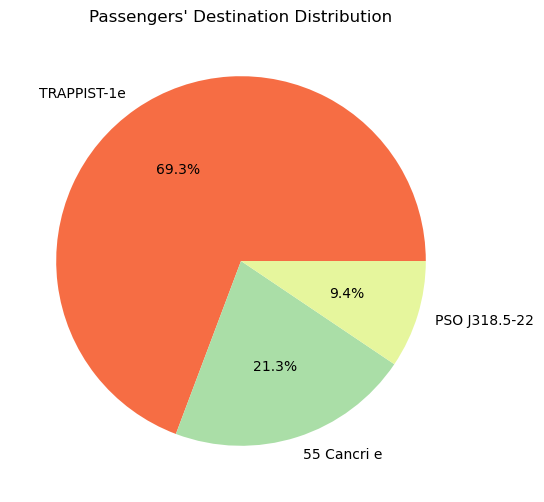

In [26]:
df['Destination'].fillna('others', inplace=True)

# Count the number of passengers from each home planet
planet_counts = df['Destination'].value_counts()
mycolors = ["#F66D44", "#AADEA7", "#E6F69D", "#64C2A6"]
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(planet_counts, labels=planet_counts.index, autopct='%1.1f%%', colors=mycolors)
plt.title("Passengers' Destination Distribution")

# Display the chart
plt.show()

### **Age distribution of passengers**

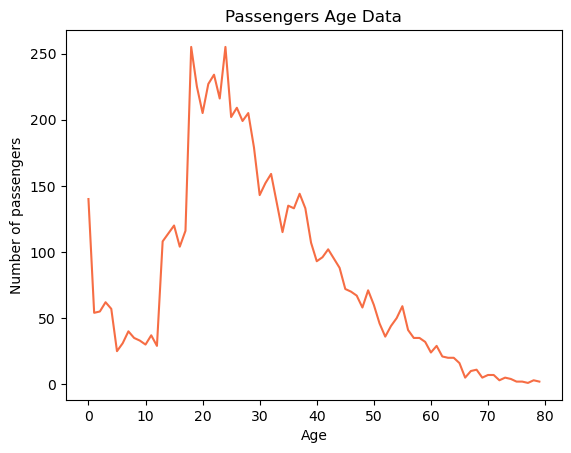

In [27]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df[df['Age'].notnull()]

# Convert the 'Passengers Age' column to float
df['Age'] = df['Age'].astype(float)
passengers_age = df['Age']

age_counts = passengers_age.value_counts().sort_index()
line_color = '#F66D44'

plt.plot(age_counts.index, age_counts.values, color=line_color)


plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Passengers Age Data')


plt.show()

## *Prediction Model-Random Forest Classifier*

##### *Random Forest is a suitable choice for this dataset due to its ability to handle a mix of categorical and numerical features, capture complex relationships, and provide feature importance. With features such as home planet, cryo-sleep status, cabin details, destination, age, VIP status, and various amenities, the dataset likely contains diverse patterns and interactions. Random Forest's ensemble of decision trees can effectively learn and predict whether a passenger was transported to an alternate dimension during the collision. Additionally, the feature importance provided by Random Forest can help identify the most influential factors contributing to the prediction. Overall, Random Forest offers a robust and interpretable solution for this classification task.*

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



features = df[['HomePlanet', 'CryoSleep',  'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
target = df['Transported']


features_encoded = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100


print("Accuracy of the model: {:.2f}%".format(accuracy))




Accuracy of the model: 79.31%


In [29]:
from joblib import dump

# Assuming you have trained the Random Forest Classifier and stored it in the variable 'rf_classifier'

# Save the model to a file
dump(rf_classifier, 'random_forest_model.joblib')


['random_forest_model.joblib']

#### *Handling test data*

In [30]:
test_data = pd.read_csv('test.csv')

In [31]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [32]:
test_data.dropna(inplace=True)

In [33]:
# getting all the columns with string/mixed type values
str_cols = list(test_data.columns)
str_cols.remove('Age')
str_cols.remove('RoomService')
str_cols.remove('FoodCourt')
str_cols.remove('ShoppingMall')
str_cols.remove('Spa')
str_cols.remove('VRDeck')


In [34]:
for i in str_cols:
    if test_data[i].dtype == 'object':
        test_data[i] = test_data[i].astype(str).str.strip()

In [35]:
test_data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

#### *Model on Test Data*

In [36]:
test_features = test_data[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

# Perform feature encoding on the test data
test_features_encoded = pd.get_dummies(test_features)

In [37]:
from joblib import load

rf_classifier = load('random_forest_model.joblib')


In [38]:
test_predictions = rf_classifier.predict(test_features_encoded)


In [39]:
test_data['Transported'] = test_predictions
print(test_data[['PassengerId', 'Transported']])


     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01        False
...          ...          ...
4269     9263_01         True
4270     9265_01         True
4271     9266_01         True
4272     9266_02        False
4276     9277_01        False

[3281 rows x 2 columns]


In [40]:
submission_data = test_data[['PassengerId', 'Transported']].copy()

In [41]:
submission_data

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4269,9263_01,True
4270,9265_01,True
4271,9266_01,True
4272,9266_02,False


In [42]:
submission_data.to_csv('submission_data.csv', index=False)